In [3]:
# - Abstract - Train a classification model on a dataset of my choice
# - Introduction - I went to UCI ML Repo and discovered the mushroom dataset. I was told in my culinary education that gill color is best indictator that a mushroom is edible.
# - Very specific and clear research questions - How accurate is gill color to poisonous? 
# - Brief EDA(Exploratory Data Analysis)
# - Data Cleaning
# - Feature Engineering 
# - Modeling
# - Results and discussion
# - Conclusion and summary
# - Limitations and later work.
# - References and contributions
# https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data

In [4]:
!pip install python-utils

In [5]:
import numpy as np 
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
col_Names=['class','cap-shape','cap-surface','cap-color','bruises?','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape' ,'stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']

In [7]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
df = pd.read_table(url , sep=",", names=col_Names)

In [8]:
df.shape

(8124, 23)

In [9]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [10]:
#Let's pick a random sample of the dataset of mushrooms
df_sample = df.loc[np.random.choice(df.index, 8000, False)]

In [11]:
#Get all unique cap-colors
df_sample['ring-type'].unique()

array(['e', 'p', 'l', 'f', 'n'], dtype=object)

In [12]:
#Get 'gill-color' Series
ringType= df_sample['ring-type']

#Get the total number of mushrooms for each unique gill color. 
ringType.value_counts()

p    3915
e    2733
l    1270
f      47
n      35
Name: ring-type, dtype: int64

In [13]:
X=df.drop('class', axis=1) #Predictors
y=df['class'] #Response
X.head()

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [14]:
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [15]:
X.head()

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


Poisonous = 1
Edible = 0

NameError: name 'save_fig' is not defined

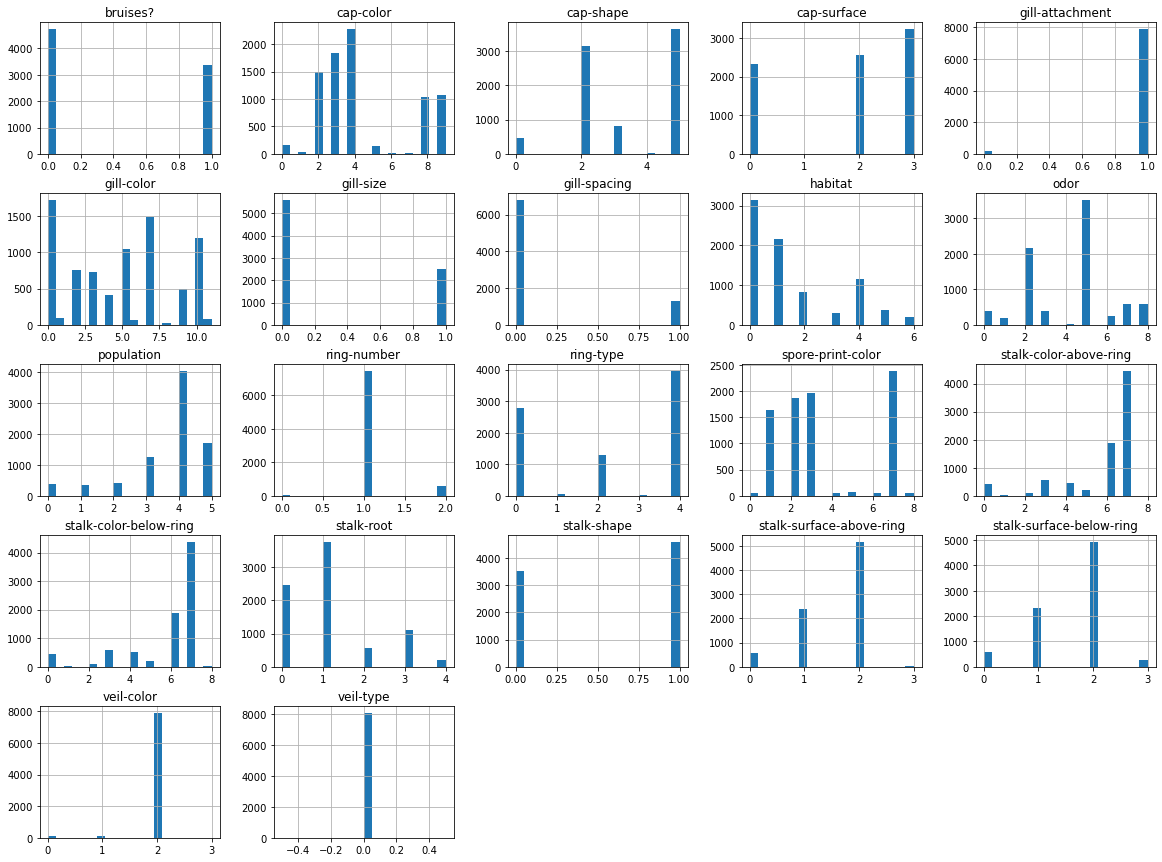

In [16]:
X.hist(bins=20, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(X,y)

LinearRegression()

In [20]:
print(lr.intercept_, lr.coef_)

0.5855105019787853 [-1.78200703e-03  2.33492101e-02 -1.35002046e-03 -3.48543229e-01
 -2.24861218e-02 -6.89235584e-02 -4.74141852e-01  5.39086108e-01
 -1.00687108e-02 -5.25753815e-02 -7.17219350e-02 -1.61188063e-01
 -5.71352254e-02 -1.09810602e-02 -6.32172647e-03  3.88578059e-16
  4.00784783e-01  3.86624879e-02  1.78301715e-02 -4.84911057e-02
 -9.91044210e-03  1.68220846e-02]


In [21]:
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify =y)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [24]:
X_train.shape, X_test.shape

((5686, 95), (2438, 95))

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logreg = LogisticRegression(penalty = 'none', random_state=1)
logreg.fit(X_train, y_train)

LogisticRegression(penalty='none', random_state=1)

In [27]:
score = logreg.score(X,y)
score

0.9852289512555391

In [28]:
predictions = logreg.predict(X)

In [29]:
from sklearn import metrics

cm = metrics.confusion_matrix(y, predictions)

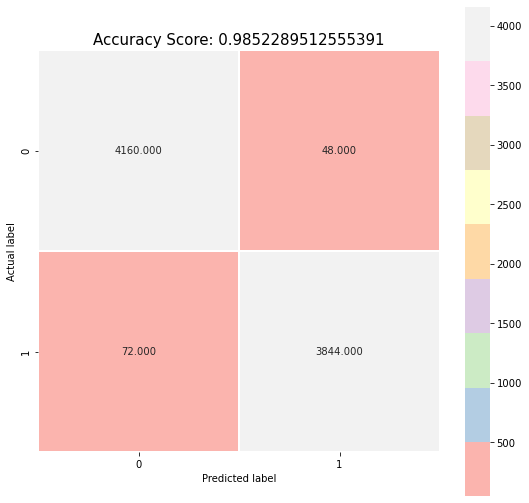

In [30]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

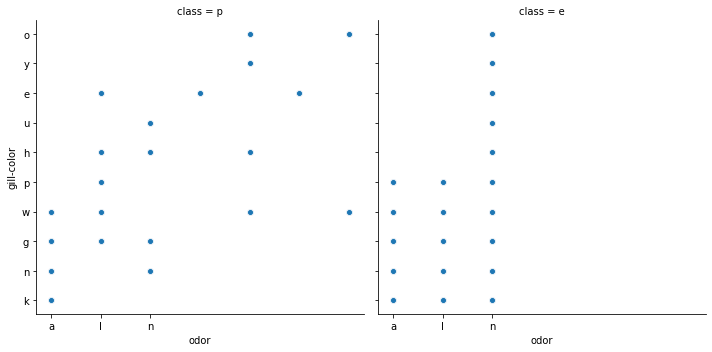

In [31]:
sns.relplot(x="odor", y="gill-color",
               col="class", aspect=1,
               kind="scatter", data=df)

plt.tight_layout()

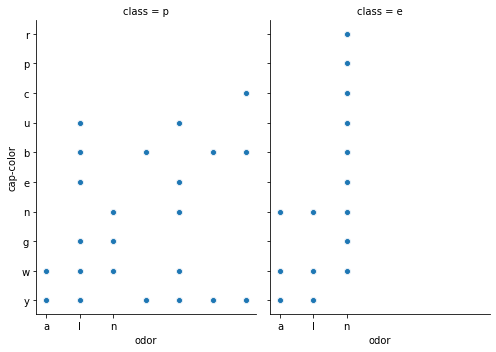

In [32]:
sns.relplot(x="odor", y="cap-color",
               col="class", aspect=.7,
               kind="scatter", data=df)

plt.tight_layout()

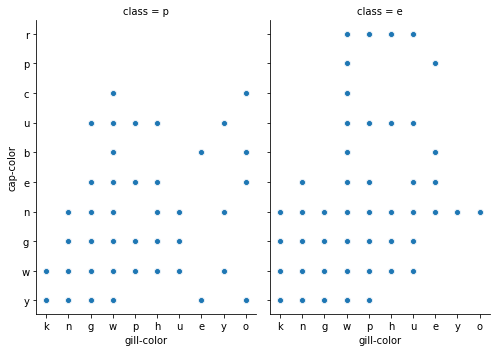

In [33]:
sns.relplot(x="gill-color", y="cap-color",
               col="class", aspect=.7,
               kind="scatter", data=df)

plt.tight_layout()